In [1]:
import kwant
import scipy
import numpy as np
from scipy.linalg import block_diag

from types import SimpleNamespace

import Modules.pauli as pauli
import Modules.TB_parameters as Tpar
import Modules.ribbon_params_11_band as rp
import Modules.Ham_MX2_11_band as Ham
import Modules.functions as func

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Lattice, onsites, hoppings and shapes for $MX_2$ ribbons

## Test the 2D model that does not separate $X_A$ and $X_B$ atoms

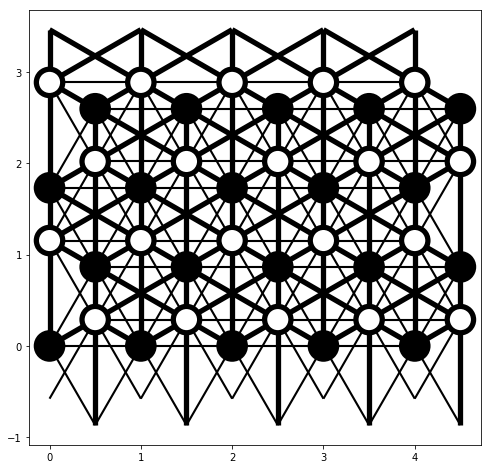

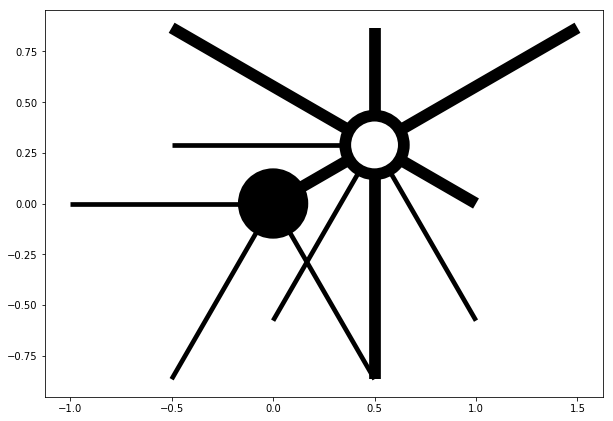

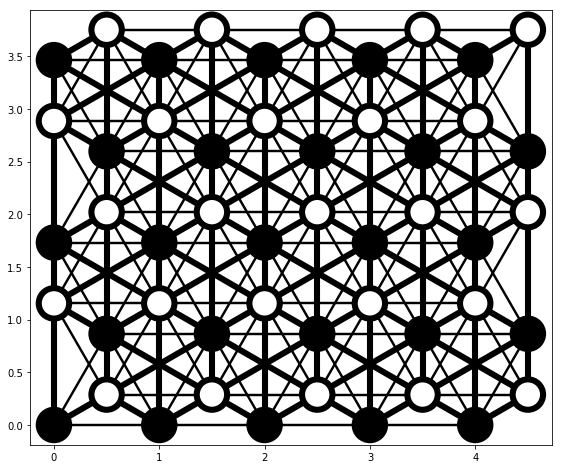

In [3]:
spin = True; SC = True
lead = func.MX2_system(W = 5, sys_type='lead', spin=spin, SC=SC, plot_sys=True)
bulk = func.MX2_system(sys_type='bulk', spin=spin, SC=SC, plot_sys=True)
finite = func.MX2_system(W = 5, sys_type='finite', spin=spin, SC=SC, plot_sys=True)

# Tests

In [4]:
params=dict(Ex=0, Ey=0, Delta=0, mu = 1)

/opt/conda/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:1025: UserWarning: Axes3D.figure.canvas is 'None', mouse rotation disabled.  Set canvas then call Axes3D.mouse_init().
  warnings.warn('Axes3D.figure.canvas is \'None\', mouse rotation disabled.  Set canvas then call Axes3D.mouse_init().')


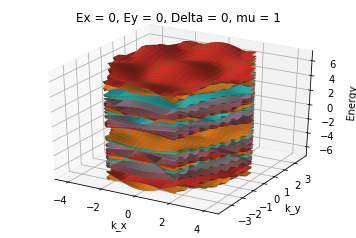

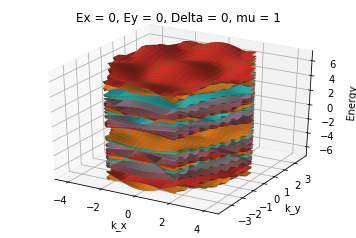

In [5]:
wrapped = kwant.wraparound.wraparound(bulk).finalized()
kwant.wraparound.plot_2d_bands(wrapped, mask_brillouin_zone=True, params=params)

## Check the functions that transform from cartesian momenta to lattice momenta

Column matrix of reciprocal lattice vecs, in units of $2\pi$

$g_1 = 2\pi (1, 1/\sqrt{3})$ and $g_2 = 4\pi/\sqrt{3} (0, 1)$

In [6]:
A = func.rec_lattice_vectors(wrapped)

In [7]:
A

array([[ 1.        ,  0.        ],
       [ 0.57735027,  1.15470054]])

In the basis of reciprocal lattice vectors, the K point should be at $(4\pi/3, -4\pi/6)$

In [8]:
Tpar.Kp

array([  4.18879020e+00,   2.96059473e-16])

In [9]:
func.momentum_to_lattice(np.array([Tpar.Kp[0], 0]), A)

array([ 4.1887902, -2.0943951])

## Compare dispersions along $K$ to $\Gamma$ line

In [10]:
# From the Bloch Hamiltonian in the paper
Ex = 0.003; Ey = 0.005; Delta = 0.8e-3; mu = 1.7
p = SimpleNamespace(mu=mu, Delta=Delta, lambda_M=0.0836, lambda_X=0.0556, Ex=Ex, Ey=Ey)
kxs = np.linspace(Tpar.Kp[0], 0, 201)
disp = [Ham.energies(kx, 0, p, spin=spin, SC=SC) for kx in kxs]

In [11]:
# From Kwant
A = func.rec_lattice_vectors(wrapped)
params = dict(k_x=0, k_y=0, Ex=Ex, Ey=Ey, Delta=Delta, mu=mu)
energies = []
for kx in kxs:
    ks = func.momentum_to_lattice(np.array([kx, 0]), A)
    params['k_x'] = ks[0]
    params['k_y'] = ks[1]
    ham = wrapped.hamiltonian_submatrix(params=params, sparse=False)
    energies.append(np.linalg.eigh(ham)[0])

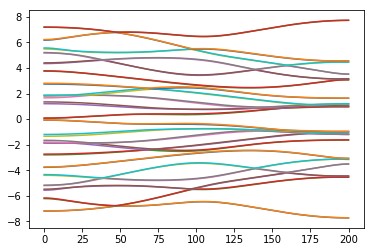

In [12]:
plt.plot(energies);

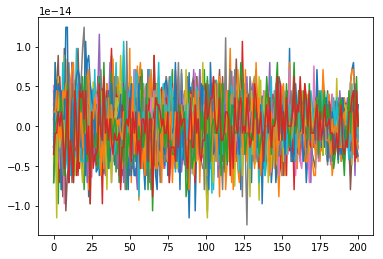

In [13]:
plt.plot(np.array(energies) - np.array(disp));

## Energies at $K$

In [14]:
Delta = 0.8e-3; mu = 0
ks = func.momentum_to_lattice(Tpar.Kp, A)
params = dict(k_x=ks[0], k_y=ks[1], Ex=0, Ey=0, Delta=Delta, mu=mu)
ham = wrapped.hamiltonian_submatrix(params=params, sparse=False)
Es1 = np.linalg.eigh(ham)[0]

In [15]:
Es1

array([-5.49692396, -5.49670184, -4.52447747, -4.50375163, -4.47699826,
       -4.4445846 , -3.8679233 , -3.79004337, -3.57308617, -3.54340875,
       -3.50686121, -3.47787536, -3.04456886, -2.90450666, -2.69958925,
       -2.64557887, -2.07700779, -2.0543012 , -1.77481412, -1.76745308,
       -0.10635729, -0.03807045,  0.03807045,  0.10635729,  1.76745308,
        1.77481412,  2.0543012 ,  2.07700779,  2.64557887,  2.69958925,
        2.90450666,  3.04456886,  3.47787536,  3.50686121,  3.54340875,
        3.57308617,  3.79004337,  3.8679233 ,  4.4445846 ,  4.47699826,
        4.50375163,  4.52447747,  5.49670184,  5.49692396])

In [16]:
p = SimpleNamespace(mu=0.0, Delta=Delta, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)
Es2 = Ham.energies(Tpar.Kp[0], Tpar.Kp[1], p, spin=spin, SC=SC)

In [17]:
Es2

array([-5.49692396, -5.49670184, -4.52447747, -4.50375163, -4.47699826,
       -4.4445846 , -3.8679233 , -3.79004337, -3.57308617, -3.54340875,
       -3.50686121, -3.47787536, -3.04456886, -2.90450666, -2.69958925,
       -2.64557887, -2.07700779, -2.0543012 , -1.77481412, -1.76745308,
       -0.10635729, -0.03807045,  0.03807045,  0.10635729,  1.76745308,
        1.77481412,  2.0543012 ,  2.07700779,  2.64557887,  2.69958925,
        2.90450666,  3.04456886,  3.47787536,  3.50686121,  3.54340875,
        3.57308617,  3.79004337,  3.8679233 ,  4.4445846 ,  4.47699826,
        4.50375163,  4.52447747,  5.49670184,  5.49692396])

In [18]:
np.allclose(Es1, Es2)

True

## Check the equivalence of the spectrum at random points

In [19]:
Ex = 0.007; Ey = 0.011; Delta = 0.8e-3; mu = 1.8
p = SimpleNamespace(mu=mu, Delta=Delta, lambda_M=0.0836, lambda_X=0.0556, Ex=Ex, Ey=Ey)
params = dict(k_x=0, k_y=0, Ex=Ex, Ey=Ey, Delta=Delta, mu=mu)
A = func.rec_lattice_vectors(wrapped)
for _ in range(400):
    kx, ky = 6*np.pi*(np.random.rand(2) - 0.5)
    Es1 = Ham.energies(kx, ky, p, spin=spin, SC=SC)
    ks = func.momentum_to_lattice(np.array([kx, ky]), A)
    params['k_x'] = ks[0]
    params['k_y'] = ks[1]
    ham = wrapped.hamiltonian_submatrix(params=params, sparse=False)
    Es2 = np.linalg.eigh(ham)[0]
    assert np.allclose(Es1, Es2)

## Check the equivalence of the dispersion from a finalized lead, and a finalized lead from wraparound

The two should be equivalent because in terms of armchair unit cells, only adjacent cells are coupled.

In [20]:
params = dict(k_x=0, k_y=0, Ex=Ex, Ey=Ey, Delta=Delta, mu=mu)

In [21]:
params

{'Delta': 0.0008, 'Ex': 0.007, 'Ey': 0.011, 'k_x': 0, 'k_y': 0, 'mu': 1.8}

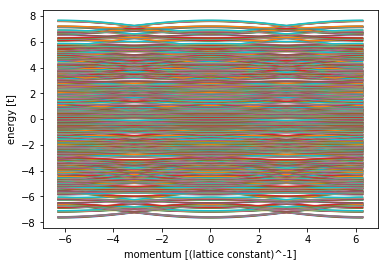

In [22]:
flead = lead.finalized()
bands = kwant.physics.Bands(flead, params=params)
momenta = np.linspace(-2*np.pi, 2*np.pi, 101)
energies = [bands(k) for k in momenta]

plt.figure()
plt.plot(momenta, energies)
plt.xlabel("momentum [(lattice constant)^-1]")
plt.ylabel("energy [t]")
plt.show()

In [23]:
params

{'Delta': 0.0008, 'Ex': 0.007, 'Ey': 0.011, 'k_x': 0, 'k_y': 0, 'mu': 1.8}

In [24]:
wrap_lead = kwant.wraparound.wraparound(lead, coordinate_names=('y', 'x', 'z')).finalized()
wrap_energies = []
for ky in momenta:
    params['k_y'] = ky
    ham = wrap_lead.hamiltonian_submatrix(params=params, sparse=False)
    wrap_energies.append(np.linalg.eigh(ham)[0])

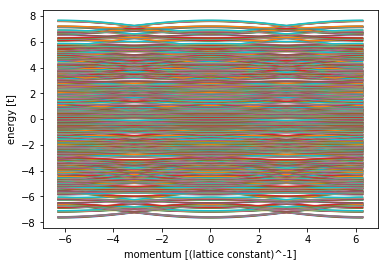

In [25]:
plt.figure()
plt.plot(momenta, wrap_energies)
plt.xlabel("momentum [(lattice constant)^-1]")
plt.ylabel("energy [t]")
plt.show()

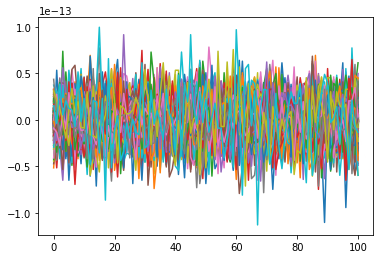

In [26]:
plt.plot(np.array(wrap_energies) - np.array(energies));

## Test the 3D model, that separates $X_A$ and $X_B$ atoms in the lattice

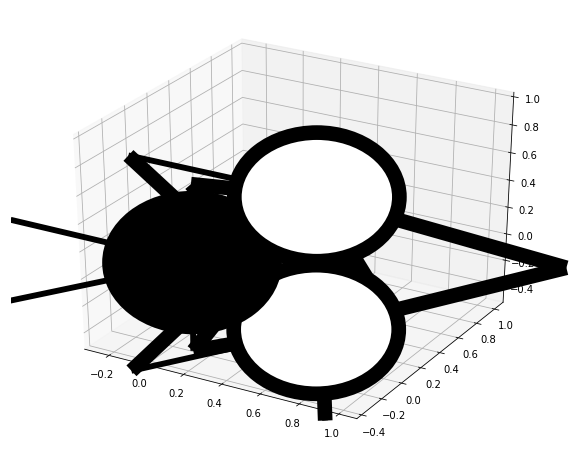

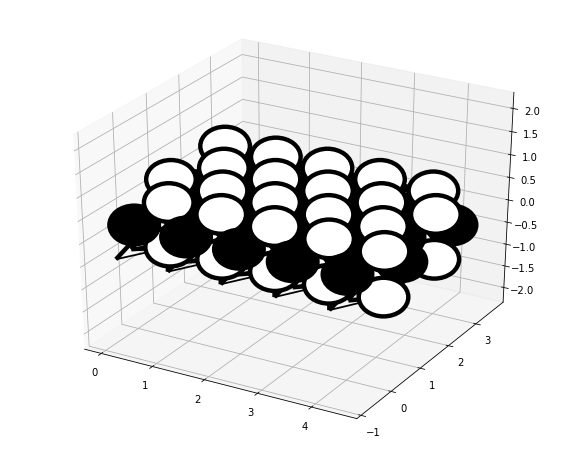

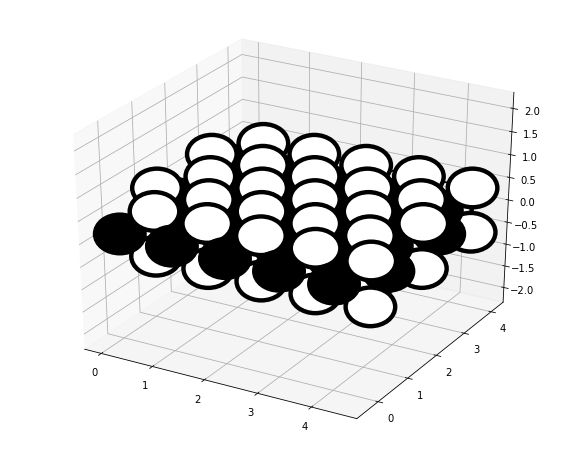

In [3]:
spin=True; SC=True
bulk = func.MX2_systems_3D(sys_type='bulk', plot_sys=True, spin=spin, SC=SC)
lead = func.MX2_systems_3D(W = 5, sys_type='lead', plot_sys=True, spin=spin, SC=SC)
finite = func.MX2_systems_3D(W = 5, sys_type='finite', plot_sys=True, spin=spin, SC=SC)

In [4]:
# # Hoppings are from site2 to site1
# hoppers = bulk.hopping_value_pairs()
# for hopper in hoppers:
#     (site1, site2), value = hopper
#     print('To ', site1.family, ' from ', site2.family)
#     print(value(site1, site2, 0).shape)

In [5]:
params=dict(Ex=0, Ey=0, Delta=0, mu = 1)

In [6]:
wrapped = kwant.wraparound.wraparound(bulk).finalized()
# Can't use plot_2d_bands since the lattice is 3D
# kwant.wraparound.plot_2d_bands(wrapped, mask_brillouin_zone=True, params=params)

In [7]:
A = func.rec_lattice_vectors(wrapped, three_d=False)

In [8]:
A

array([[ 1.        ,  0.        ],
       [ 0.57735027,  1.15470054],
       [ 0.        ,  0.        ]])

There is no momentum along z, so we ignore the lowest row.

In [9]:
A = A[:-1, :]
A

array([[ 1.        ,  0.        ],
       [ 0.57735027,  1.15470054]])

In [10]:
np.allclose(A, func.rec_lattice_vectors(wrapped, three_d=True))

True

In [11]:
wrapped._wrapped_symmetry.periods

array([[1.0, 0.0, 0.0],
       [-0.5, 0.8660254037844386, 0.0]])

In [12]:
func.momentum_to_lattice(np.array([Tpar.Kp[0], 0]), A)

array([ 4.1887902, -2.0943951])

## Dispersion from $K$ to $\Gamma$

In [13]:
# From the Bloch Hamiltonian in the paper
Ex = 0.003; Ey = 0.005; Delta = 0.8e-3; mu = 1.7
p = SimpleNamespace(mu=mu, Delta=Delta, lambda_M=0.0836, lambda_X=0.0556, Ex=Ex, Ey=Ey)
kxs = np.linspace(Tpar.Kp[0], 0, 201)
disp = [Ham.energies(kx, 0, p, spin=spin, SC=SC) for kx in kxs]

In [15]:
# From Kwant
A = func.rec_lattice_vectors(wrapped)
params = dict(k_x=0, k_y=0, Ex=Ex, Ey=Ey, Delta=Delta, mu=mu, pot=0)
energies = []
for kx in kxs:
    ks = func.momentum_to_lattice(np.array([kx, 0]), A[:-1, :])
    params['k_x'] = ks[0]
    params['k_y'] = ks[1]
    ham = wrapped.hamiltonian_submatrix(params=params, sparse=False)
    energies.append(np.linalg.eigh(ham)[0])

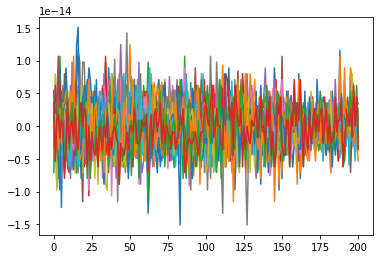

In [16]:
plt.plot(np.array(energies) - np.array(disp));

## Energies at $K$

In [18]:
Delta = 0.8e-3; mu = 0
ks = func.momentum_to_lattice(Tpar.Kp, A[:-1, :])
params = dict(k_x=ks[0], k_y=ks[1], Ex=0, Ey=0, Delta=Delta, mu=mu, pot=0)
ham = wrapped.hamiltonian_submatrix(params=params, sparse=False)
Es1 = np.linalg.eigh(ham)[0]

In [19]:
p = SimpleNamespace(mu=0.0, Delta=Delta, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)
Es2 = Ham.energies(Tpar.Kp[0], Tpar.Kp[1], p, spin=spin, SC=SC)

In [20]:
np.allclose(Es1, Es2)

True

## Energies at random points

In [21]:
Ex = 0.007; Ey = 0.011; Delta = 0.8e-3; mu = 1.8
p = SimpleNamespace(mu=mu, Delta=Delta, lambda_M=0.0836, lambda_X=0.0556, Ex=Ex, Ey=Ey)
params = dict(k_x=0, k_y=0, Ex=Ex, Ey=Ey, Delta=Delta, mu=mu, pot=0)
A = func.rec_lattice_vectors(wrapped)
for _ in range(400):
    kx, ky = 6*np.pi*(np.random.rand(2) - 0.5)
    Es1 = Ham.energies(kx, ky, p, spin=spin, SC=SC)
    ks = func.momentum_to_lattice(np.array([kx, ky]), A[:-1, :])
    params['k_x'] = ks[0]
    params['k_y'] = ks[1]
    ham = wrapped.hamiltonian_submatrix(params=params, sparse=False)
    Es2 = np.linalg.eigh(ham)[0]
    assert np.allclose(Es1, Es2)

## Include orbital effects, but set the magnetic field to zero

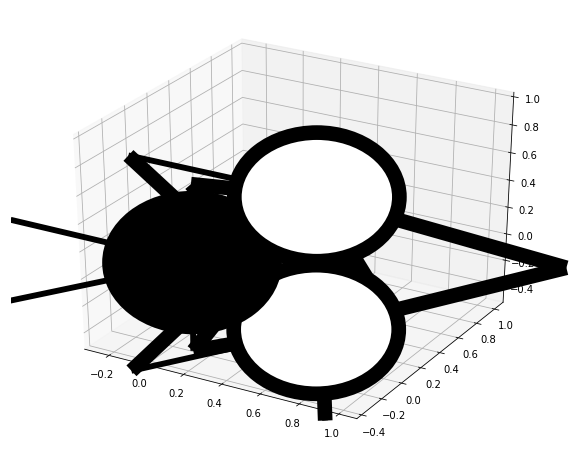

In [22]:
orb_bulk = func.MX2_systems_3D(sys_type='bulk', plot_sys=True, spin=spin, SC=SC, orb_mag=True)

In [23]:
orb_wrapped = kwant.wraparound.wraparound(orb_bulk).finalized()

In [24]:
Ex = 0.0; Ey = 0.011; Delta = 0.8e-3; mu = 1.8
p = SimpleNamespace(mu=mu, Delta=Delta, lambda_M=0.0836, lambda_X=0.0556, Ex=Ex, Ey=Ey)
params = dict(k_x=0, k_y=0, Ex=Ex, Ey=Ey, Delta=Delta, mu=mu, pot=0)
A = func.rec_lattice_vectors(wrapped)
for _ in range(400):
    kx, ky = 6*np.pi*(np.random.rand(2) - 0.5)
    Es1 = Ham.energies(kx, ky, p, spin=spin, SC=SC)
    ks = func.momentum_to_lattice(np.array([kx, ky]), A[:-1, :])
    params['k_x'] = ks[0]
    params['k_y'] = ks[1]
    ham = orb_wrapped.hamiltonian_submatrix(params=params, sparse=False)
    Es2 = np.linalg.eigh(ham)[0]
    assert np.allclose(Es1, Es2)